In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from pandas_datareader import data
# For time stamps
from datetime import datetime

In [2]:
import yfinance as yf

start = '2012-01-01'  # starting point of the data
end = '2022-12-31'    # ending point of the data

df = yf.download('AAPL', start=start, end=end)
df= df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2,2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726297,271269600
3,2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859330,318292800
4,2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838937,394024400


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2,2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726297,271269600
3,2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859330,318292800
4,2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838937,394024400


In [4]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


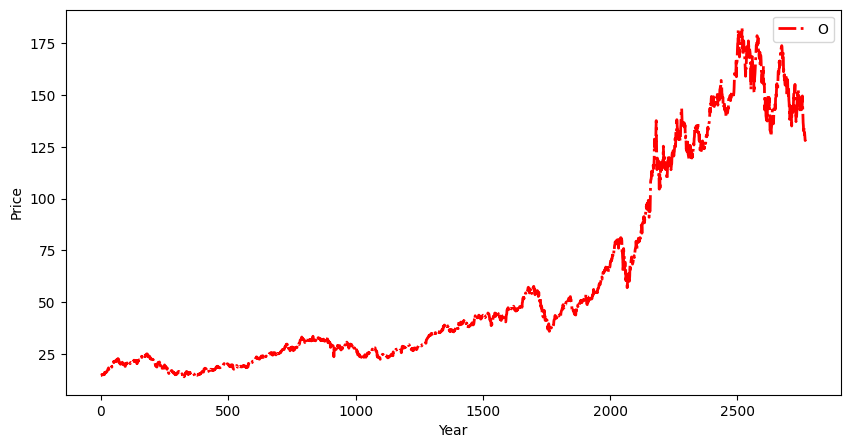

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
# plt.plot(df.Close, color = 'blue', linestyle = '-', linewidth = 2)
plt.plot(df.Open, color = 'red', linestyle = '-.', linewidth = 2)
# plt.plot(df.High, color = 'green', linestyle = ':', linewidth = 2)
# plt.plot(df.Low, color = 'purple', linestyle = '-', linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend('Open')
plt.show()

In [6]:
#For calculating moving average - For 100 days
df_ma100 = df.Open.rolling(100).mean()
df_ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    150.664401
2764    150.318101
2765    149.982701
2766    149.598901
2767    149.242801
Name: Open, Length: 2768, dtype: float64

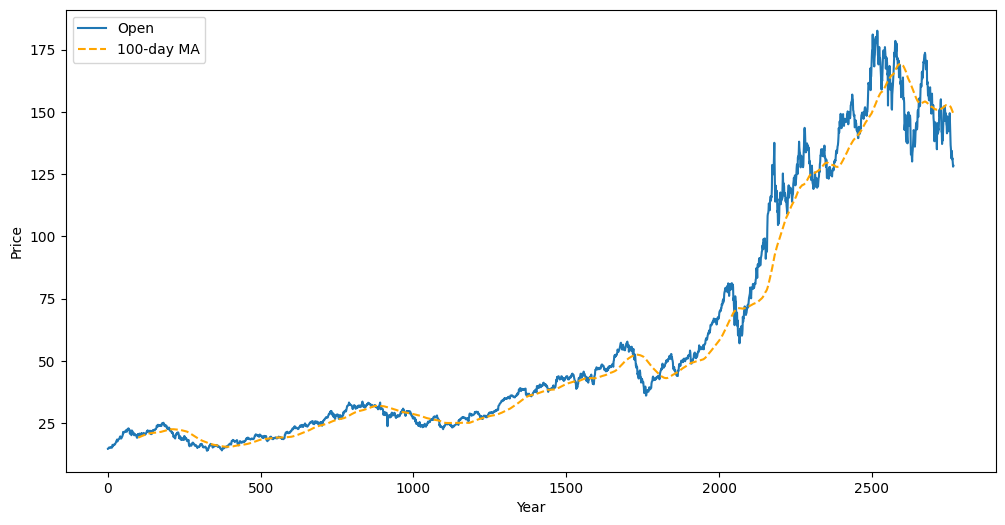

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(df.Open, label='Open')
# plt.plot(df.Close, label='Close')
# plt.plot(df.High, label='High')
# plt.plot(df.Low, label='Low')
plt.plot(df_ma100, label='100-day MA', color = 'orange', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
#For calculating moving average - For 200 days
df_ma200 = df.Open.rolling(200).mean()
df_ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2763    152.02510
2764    151.88735
2765    151.77845
2766    151.66390
2767    151.52070
Name: Open, Length: 2768, dtype: float64

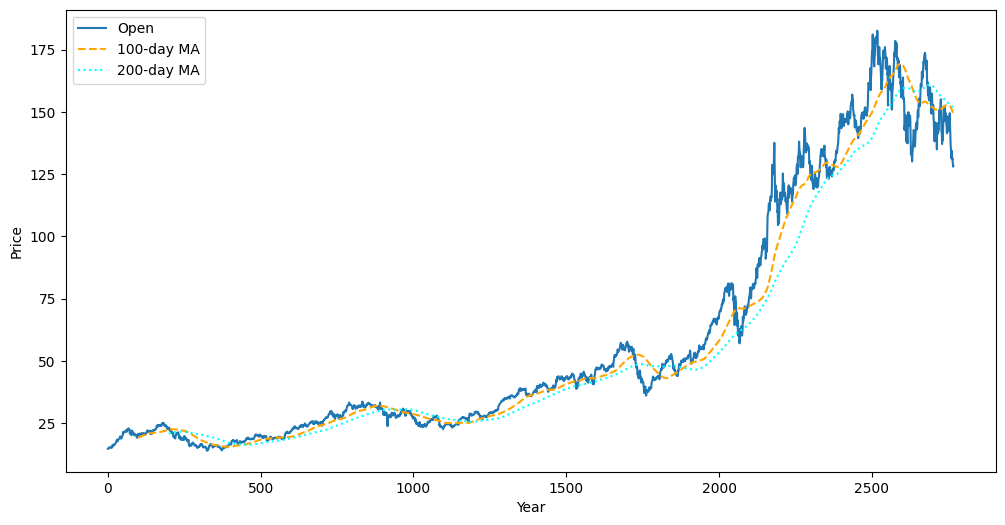

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df.Open, label='Open')
# plt.plot(df.Close, label='Close')
# plt.plot(df.High, label='High')
# plt.plot(df.Low, label='Low')
plt.plot(df_ma100, label='100-day MA', color = 'orange', linestyle='--')
plt.plot(df_ma200, label='200-day MA', color = 'cyan', linestyle=':')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
df.shape

(2768, 5)

In [11]:
#Spilliting data into training and testing

data_training = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Open'][int(len(df)*0.70):int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [12]:
data_training.head()

,Open
0,14.621429
1,14.642857
2,14.819643
3,14.991786
4,15.196429


In [13]:
data_testing.head()

,Open
1937,54.432499
1938,54.990002
1939,55.264999
1940,55.502499
1941,55.345001


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#input
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01745841],
       [0.01794718],
       [0.02197982],
       ...,
       [0.92751881],
       [0.96589791],
       [0.93852496]])

In [15]:
data_training_array.shape

(1937, 1)

In [16]:
#Now we have to divide our data into x train and y train
x_train = []           # 1937 data is in my training part 
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
import numpy as np    
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train.shape

(1837, 100, 1)

In [18]:
#ML Model starts.---
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [19]:
#see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
#compile our model
model.compile(optimizer='adam', loss = 'mean_squared_error')
#fit the data
model.fit(x_train, y_train, epochs = 70)

Epoch 1/70
58/58 [==============================] - 14s 183ms/step - loss: 0.0338
Epoch 2/70
58/58 [==============================] - 11s 186ms/step - loss: 0.0071
Epoch 3/70
58/58 [==============================] - 11s 198ms/step - loss: 0.0064
Epoch 4/70
58/58 [==============================] - 14s 234ms/step - loss: 0.0069
Epoch 5/70
58/58 [==============================] - 14s 237ms/step - loss: 0.0064
Epoch 6/70
58/58 [==============================] - 13s 217ms/step - loss: 0.0055
Epoch 7/70
58/58 [==============================] - 14s 241ms/step - loss: 0.0050
Epoch 8/70
58/58 [==============================] - 13s 218ms/step - loss: 0.0055
Epoch 9/70
58/58 [==============================] - 14s 236ms/step - loss: 0.0046
Epoch 10/70
58/58 [==============================] - 12s 212ms/step - loss: 0.0052
Epoch 11/70
58/58 [==============================] - 12s 209ms/step - loss: 0.0044
Epoch 12/70
58/58 [==============================] - 12s 210ms/step - loss: 0.0047
Epoch 13/70
5

In [21]:
#save the model
model.save('test1_1.h5')

In [22]:
#now using testing data to predict values
data_testing.head()

,Open
1937,54.432499
1938,54.990002
1939,55.264999
1940,55.502499
1941,55.345001


In [23]:
#fecting last 100 days data for detection 
past_100_days = data_training.tail(100)

In [24]:
#appending past 100days data into training data
import pandas as pd
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [25]:
#to see final data
final_df.head()          

,Open
0,51.840000
1,51.707500
2,51.224998
3,51.099998
4,50.764999


In [26]:
#scaling the data
input_data = scaler.fit_transform(final_df)
input_data

array([[5.75052194e-02],
       [5.65504043e-02],
       [5.30734138e-02],
       [5.21726428e-02],
       [4.97585830e-02],
       [6.20451131e-02],
       [6.19730360e-02],
       [6.38646607e-02],
       [5.19744721e-02],
       [5.48389448e-02],
       [4.76687876e-02],
       [4.49664745e-02],
       [3.95978869e-02],
       [2.21049288e-02],
       [1.97629186e-02],
       [1.95107039e-02],
       [2.60683159e-02],
       [2.06997007e-02],
       [1.45564632e-02],
       [1.76190792e-02],
       [1.66102200e-02],
       [7.85472450e-03],
       [8.57533033e-03],
       [6.26935869e-03],
       [1.76550353e-03],
       [4.52186069e-03],
       [1.42320614e-03],
       [2.88253328e-04],
       [0.00000000e+00],
       [1.59256253e-02],
       [1.37637803e-02],
       [1.99430564e-02],
       [2.94912348e-02],
       [3.49859436e-02],
       [3.33465337e-02],
       [3.46976903e-02],
       [2.90228438e-02],
       [3.14549091e-02],
       [3.71297831e-02],
       [4.36693621e-02],


In [27]:
#to see shape
input_data.shape

(931, 1)

In [28]:
#define test data
x_test = []           
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i])

In [29]:
#convert xtest,ytest into numpy to provide it to LSTM    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831, 1)


In [30]:
#MAKING PREDICTION
y_predicted = model.predict(x_test)
#check shape                        
y_predicted.shape

26/26 [==============================] - 4s 130ms/step


(831, 1)

In [31]:
#print y test
y_test

array([[0.0761872 ],
       [0.08020466],
       [0.08218634],
       [0.0838978 ],
       [0.08276285],
       [0.07838509],
       [0.0821323 ],
       [0.07766448],
       [0.08027671],
       [0.08124953],
       [0.08189809],
       [0.08941054],
       [0.08578942],
       [0.07744828],
       [0.09043741],
       [0.09157239],
       [0.0907617 ],
       [0.09294155],
       [0.09456293],
       [0.10360667],
       [0.10711968],
       [0.10980398],
       [0.10436332],
       [0.10746197],
       [0.1065612 ],
       [0.11183973],
       [0.11839735],
       [0.1200908 ],
       [0.1244325 ],
       [0.12200043],
       [0.12967499],
       [0.13246739],
       [0.12488288],
       [0.12935073],
       [0.13349425],
       [0.14752825],
       [0.14702382],
       [0.14651939],
       [0.15006843],
       [0.14997838],
       [0.14927575],
       [0.15513076],
       [0.15437414],
       [0.15909418],
       [0.15896805],
       [0.16278731],
       [0.16657056],
       [0.162

In [32]:
#print y predicted
y_predicted

array([[0.07059354],
       [0.07210124],
       [0.07356854],
       [0.07495126],
       [0.07624446],
       [0.07743184],
       [0.07844269],
       [0.07928003],
       [0.07991877],
       [0.08038642],
       [0.08074331],
       [0.08104907],
       [0.08144063],
       [0.08195227],
       [0.08245096],
       [0.082996  ],
       [0.08366351],
       [0.08445928],
       [0.08537732],
       [0.08640569],
       [0.08763063],
       [0.08912836],
       [0.09092411],
       [0.09288582],
       [0.09490187],
       [0.0968602 ],
       [0.09874879],
       [0.10065818],
       [0.10265791],
       [0.10481851],
       [0.10709703],
       [0.10952669],
       [0.11213534],
       [0.11476034],
       [0.1173085 ],
       [0.119775  ],
       [0.12238783],
       [0.12526831],
       [0.12840441],
       [0.13176045],
       [0.13523985],
       [0.13869995],
       [0.14210425],
       [0.1453937 ],
       [0.14858575],
       [0.15167098],
       [0.15468365],
       [0.157

In [33]:
sf = scaler.scale_

In [34]:
scale_factor = 1/sf
y_predicted =  y_predicted * sf
y_test =y_test*sf

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print("MSE: ", mse)
print("R-squared: ", r2)


26/26 [==============================] - 4s 173ms/step
MSE:  9.736076761762384e-08
R-squared:  0.9705608609125999


In [36]:
# An R-squared value of 0.9483717357337527 means that 94.8% of the variance in the output variable is explained by the model.
#This is a relatively high value, indicating that the model is a good fit for the data.

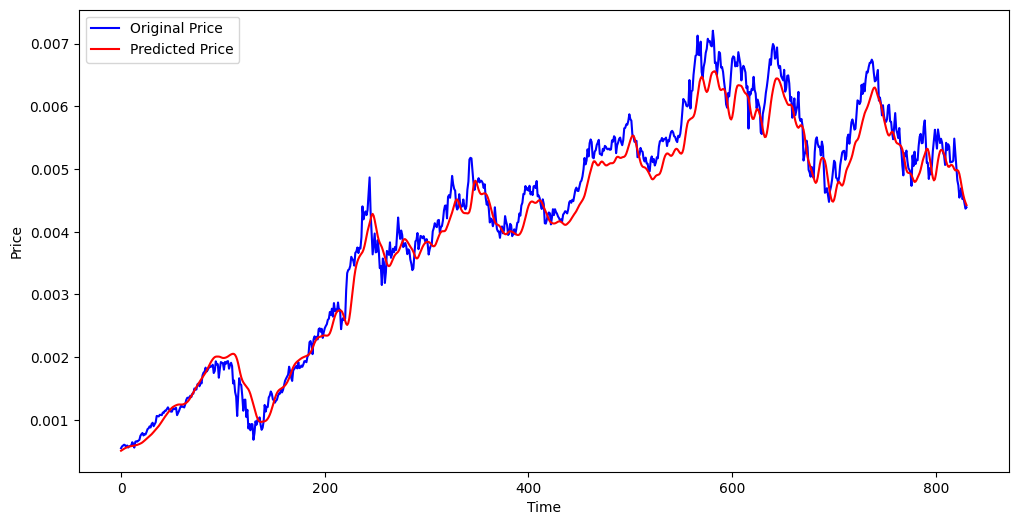

In [37]:
#plot the original and predicted values
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()